In [71]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def genBoard(M,N):
    '''
    Generates an NxN 2D numpy array filled with 0's with M 1's
    input: integers M, N
    output: NxN 2D numpy array filled with 0's with M 1's
    '''
    board = np.zeros(N*N)
    idx = np.random.choice(N*N,M,replace=False)
    board[idx]=1
    board = board.reshape(N,N)
    return(board)


In [ ]:
def drawBoard(board,i='NA'):
    '''
    Draws a 2D numpy array using the plt imshow function
    '''
    fig,ax=plt.subplots(figsize=[5,5])
    ax.imshow(board)
    return(fig)


In [ ]:
def countNear(board):
    '''
    Count neighbors in a 2D numpy array of 1's and 0's. Only 4 nearest neighbors
    are counted (no diagonals!)
    input: 2D numpy array with ones and zeros
    output: 2D numpy array with number of neighbors for each element
    '''
    nears=np.zeros_like(board)
    for roll in [-1,1]:
        board_roll=np.roll(board,roll,axis=0)
        nears+=board_roll
        board_roll=np.roll(board,roll,axis=1)
        nears+=board_roll
    return(nears)

In [ ]:
def golStep(board):
    '''
    Advances a 2D matrix of ones and zeros according to the rules of conway's game of life
    Input: 2D numpy array with ones and zeros
    Output: 2D numpy array with ones and zeros
    '''

    # new board starts from a copy of the old one
    newBoard=np.copy(board)
    # count nearest neighbors
    nears = countNear(board)
    # indices of live cells with less than 2 neighbors
    [X,Y]=np.where((board==1) & (nears<2))
    # set these indices to 0 (die off)
    newBoard[X,Y]=0
    # indices of live cells with more than 3 neighbors
    [X,Y]=np.where((board==1) & (nears>3))
    # set these indices to 0 (die off)
    newBoard[X,Y]=0
    # indices of dead cells with 3 neighbors
    [X,Y]=np.where((board==0) & (nears==3))
    # set these indices to 1 (proliferate)
    newBoard[X,Y]=1 
    # indices where there are 2 neighbors
    return(newBoard)

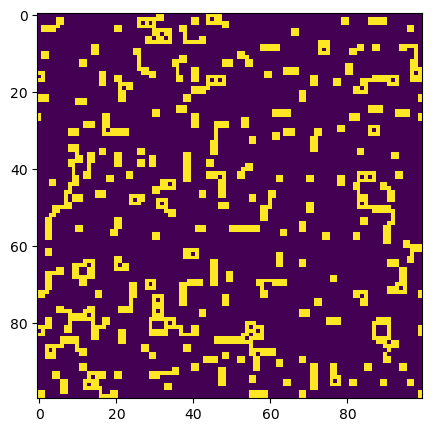

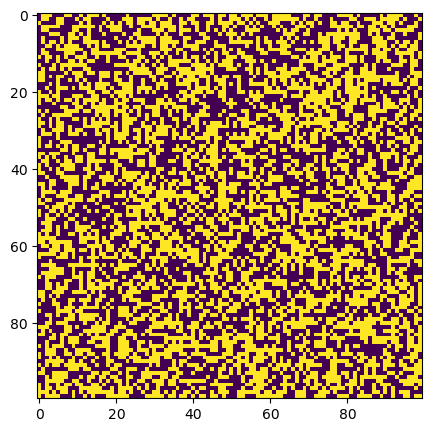

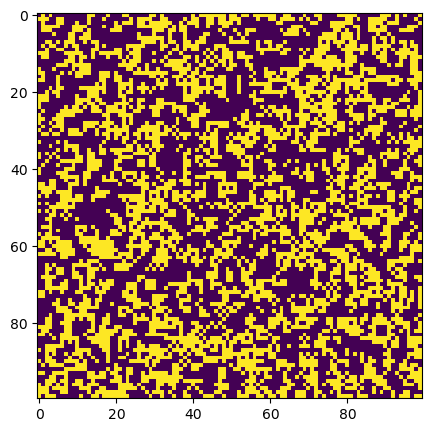

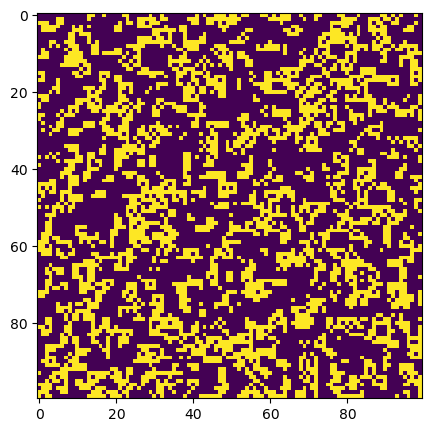

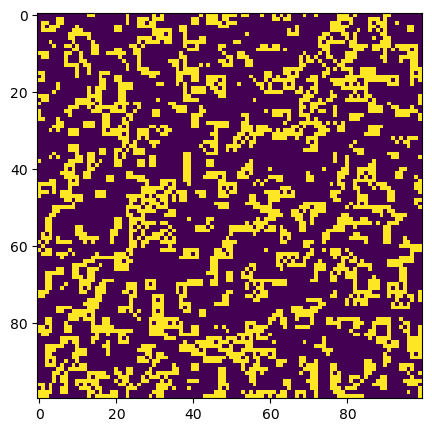

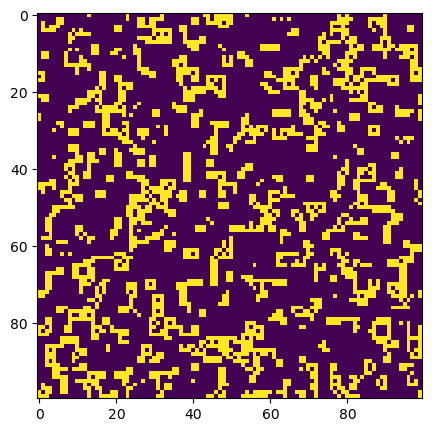

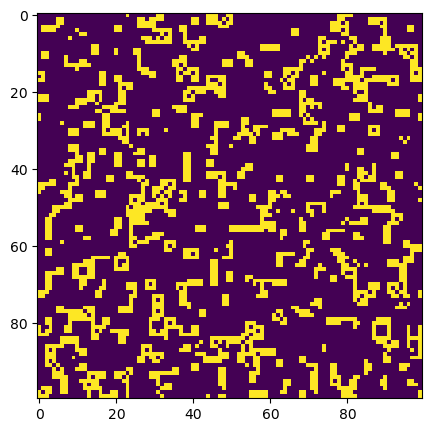

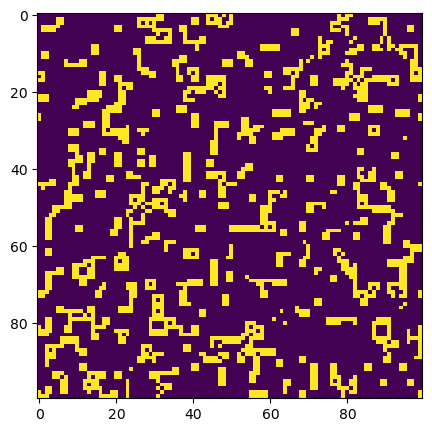

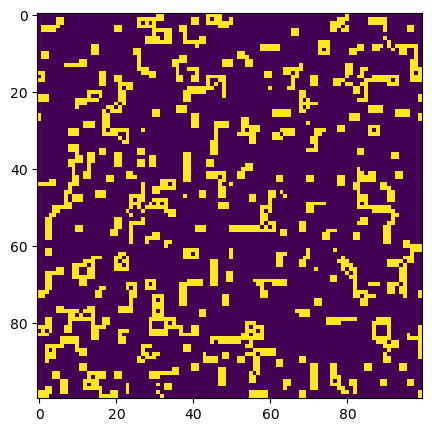

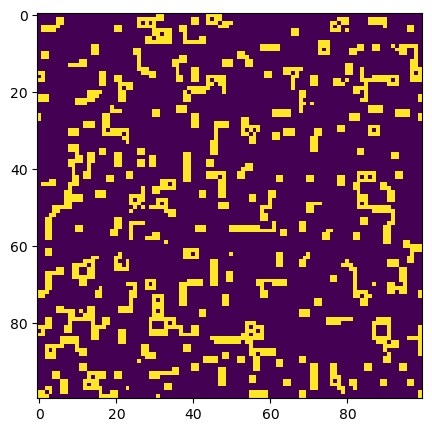

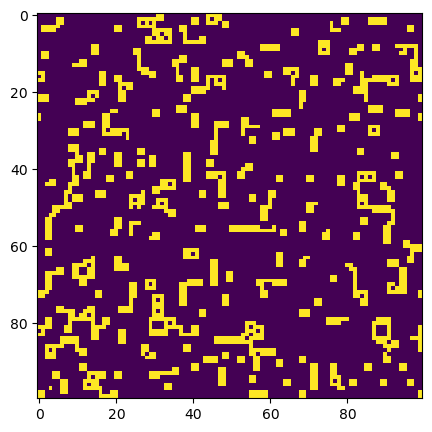

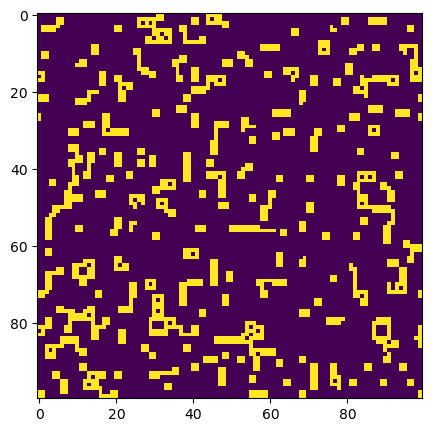

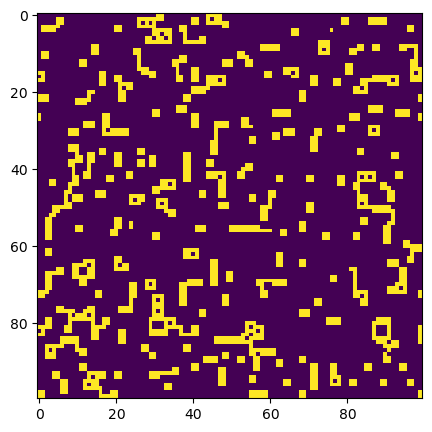

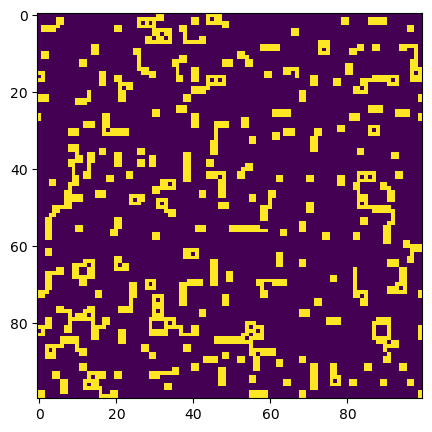

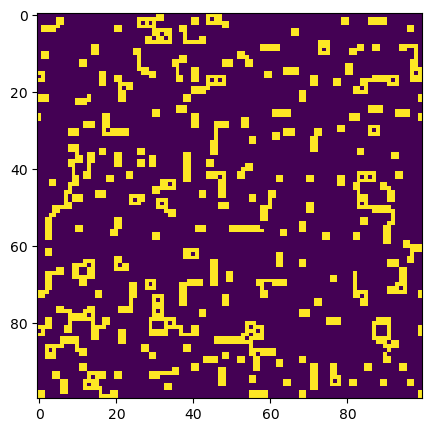

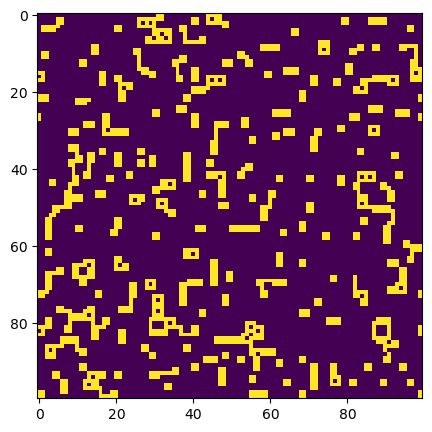

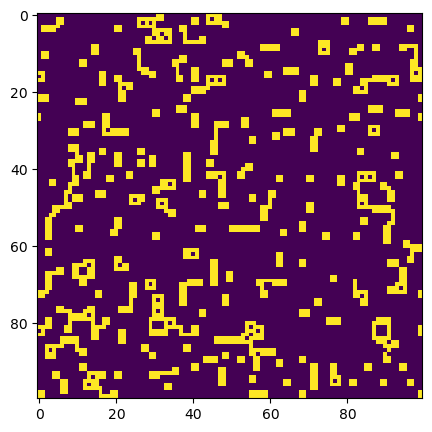

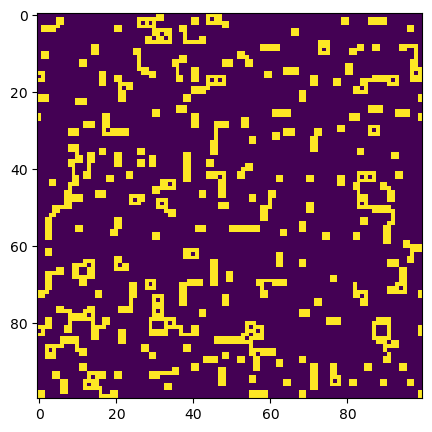

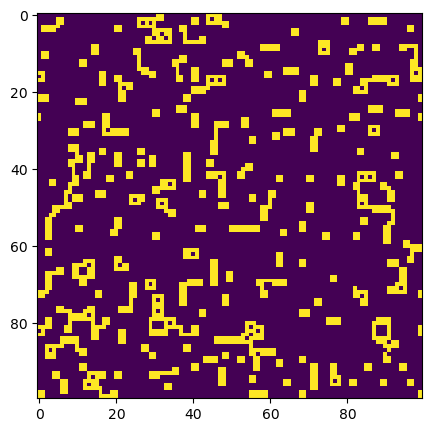

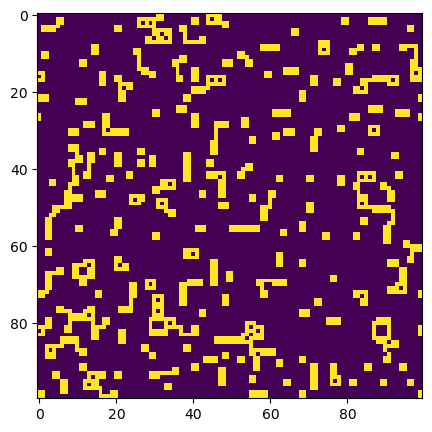

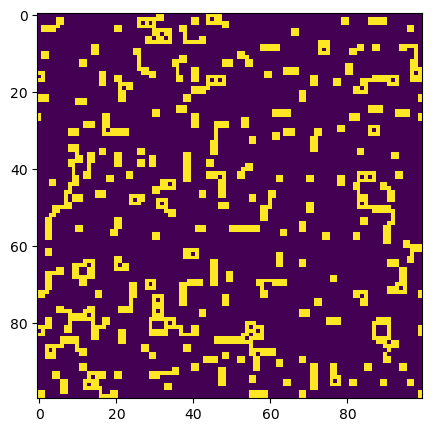

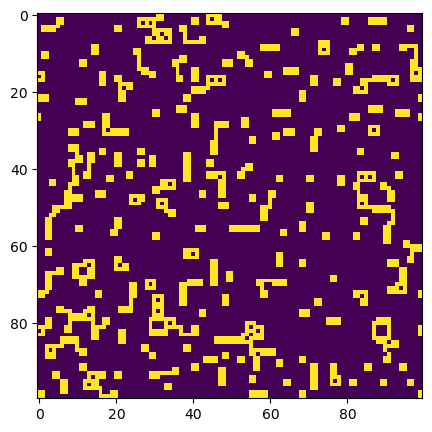

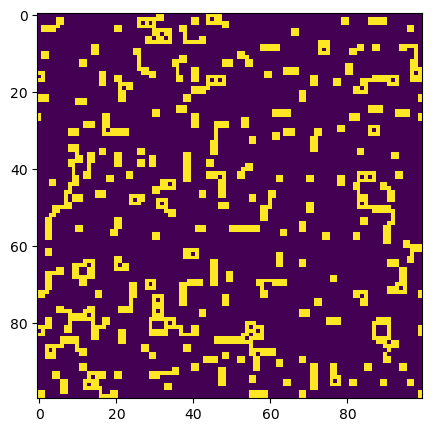

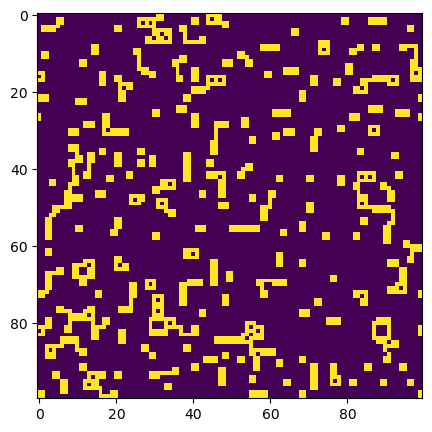

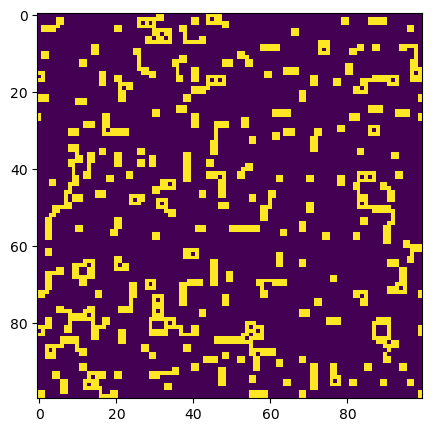

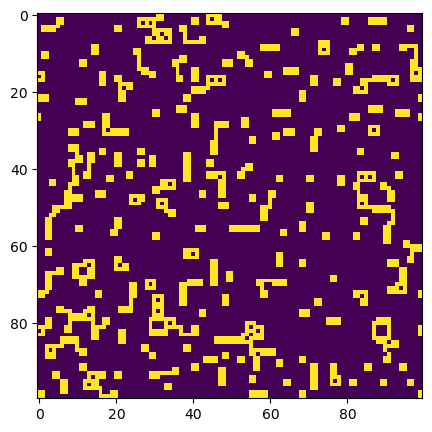

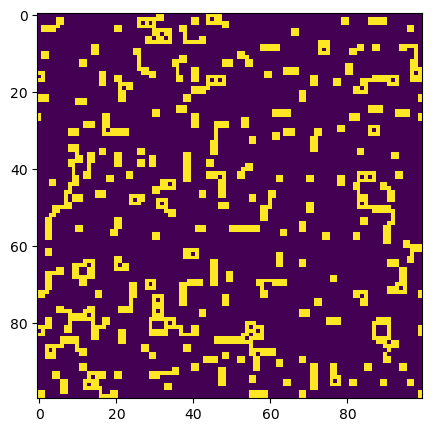

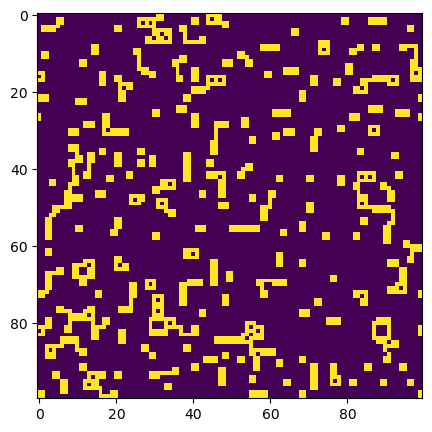

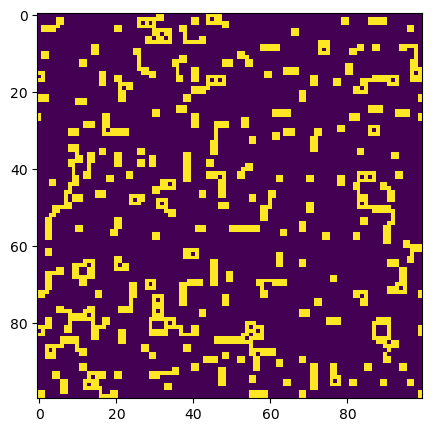

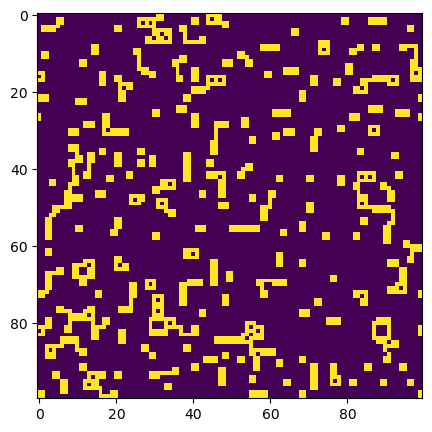

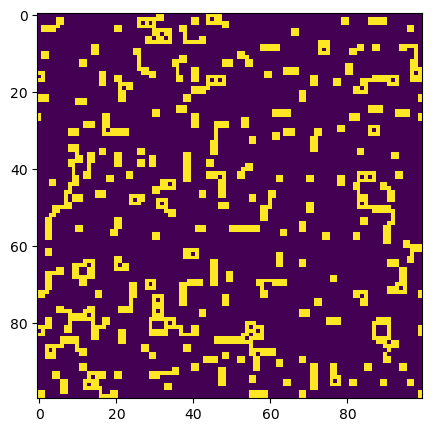

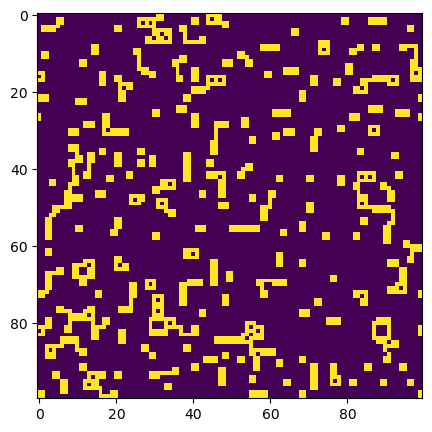

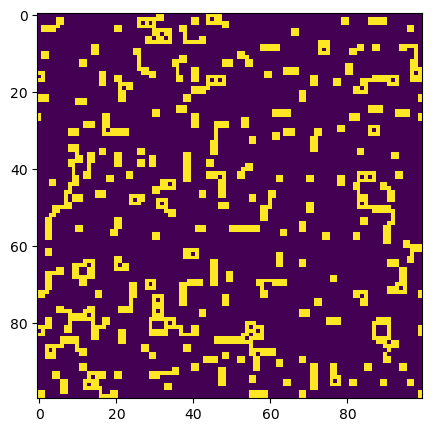

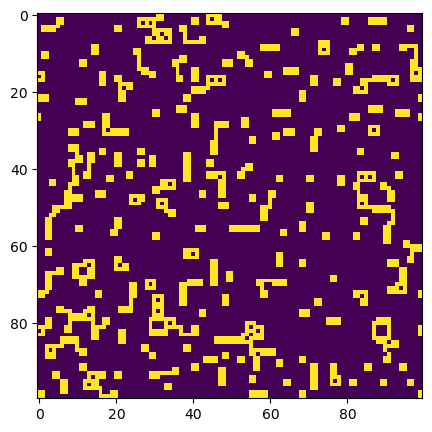

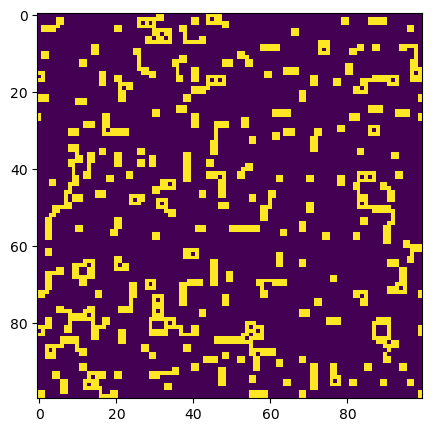

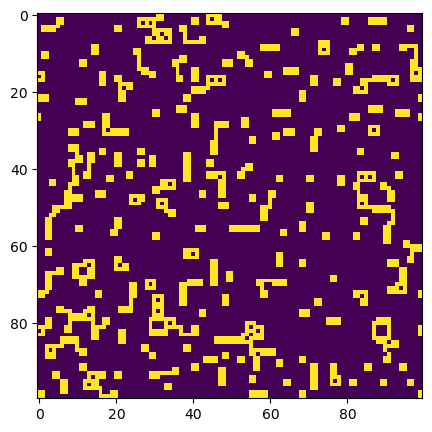

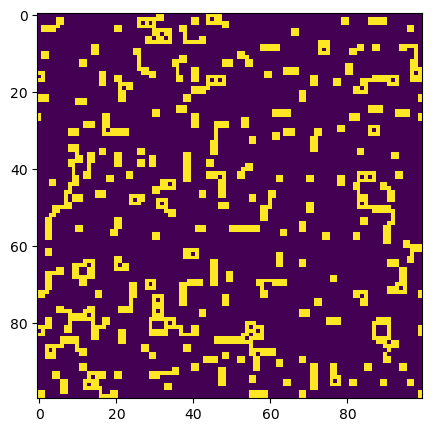

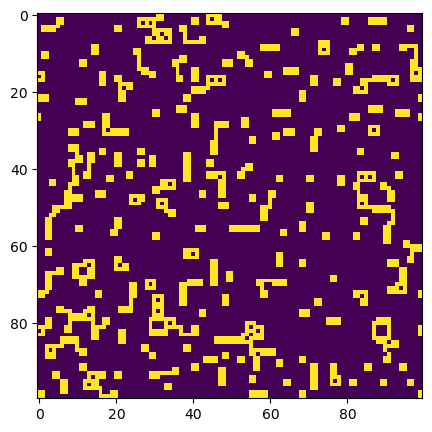

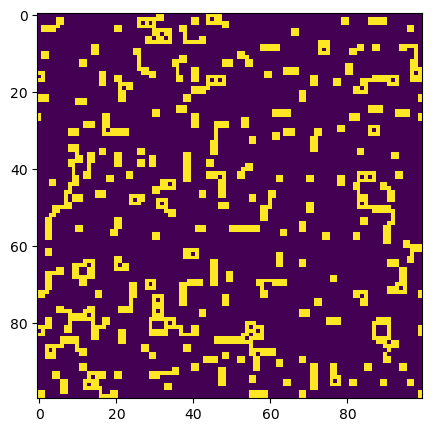

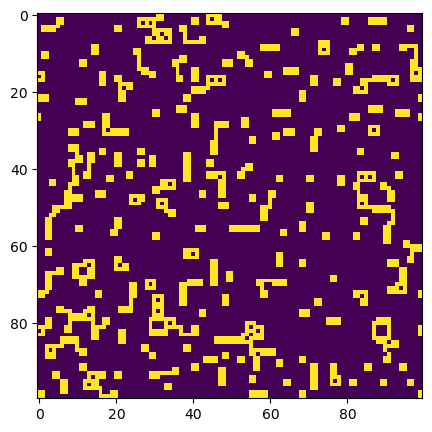

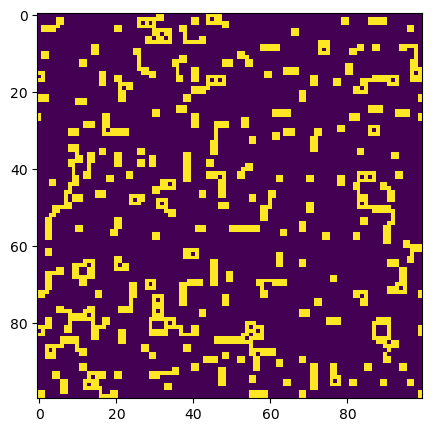

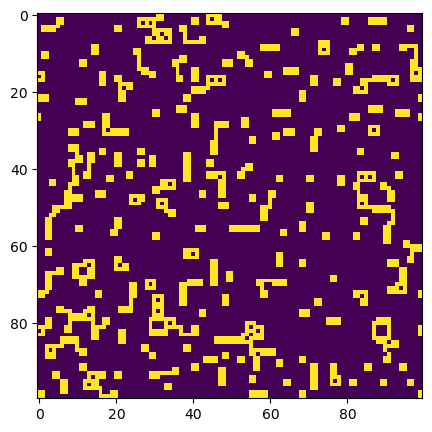

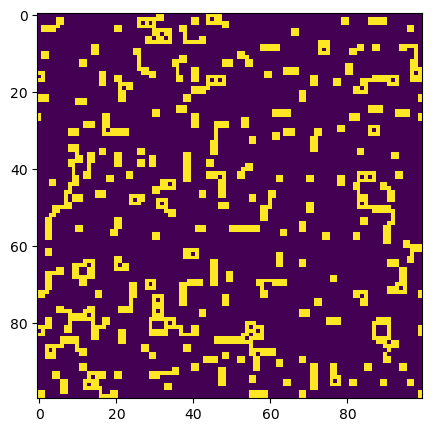

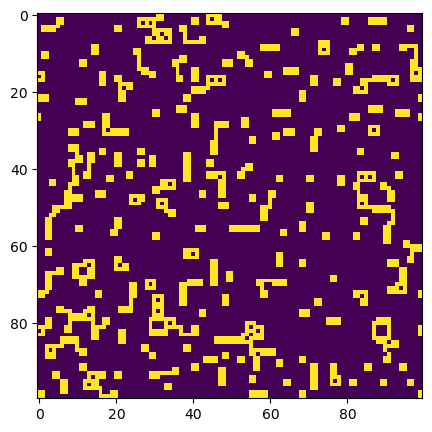

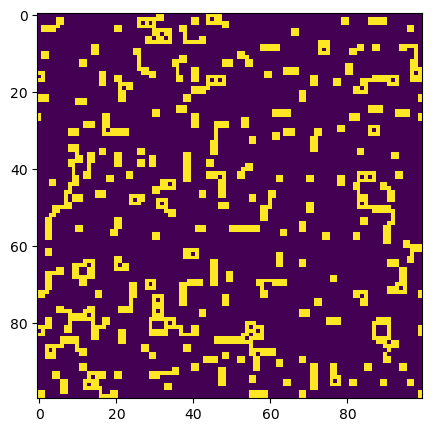

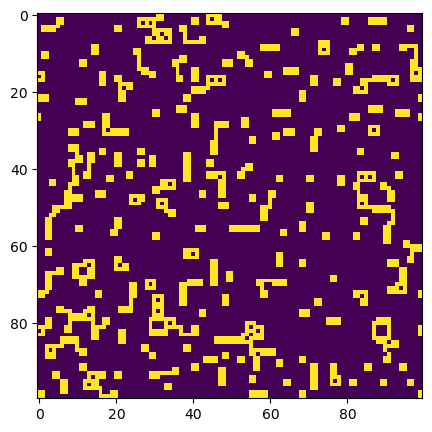

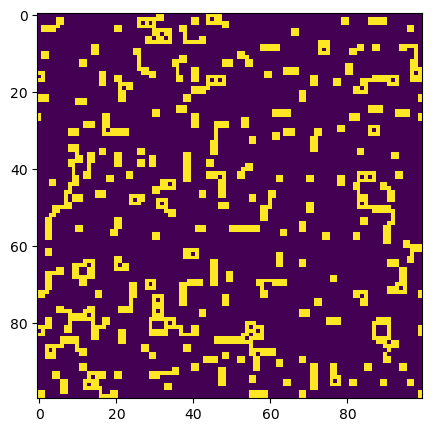

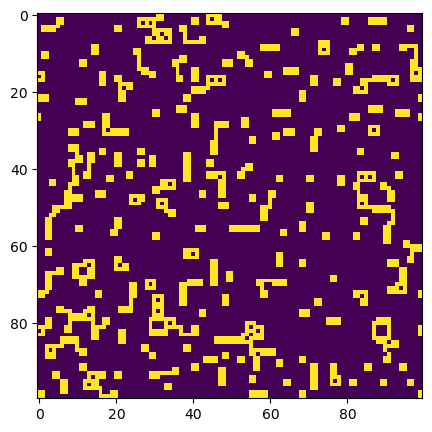

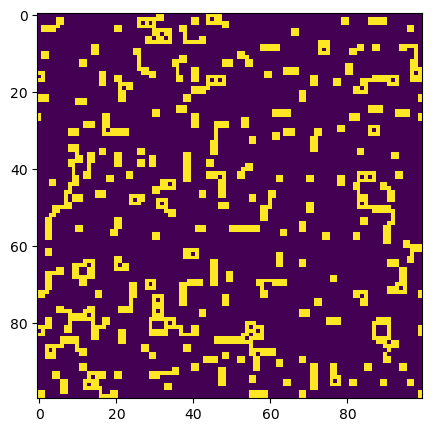

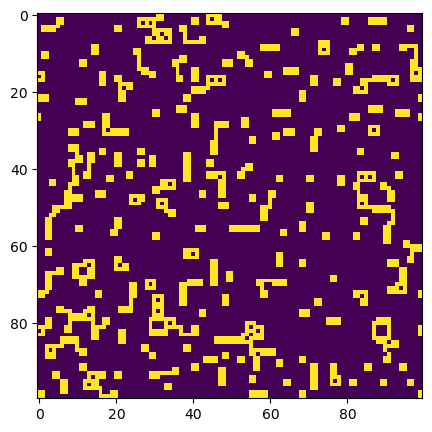

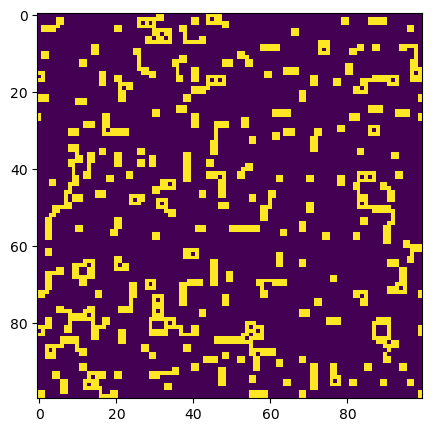

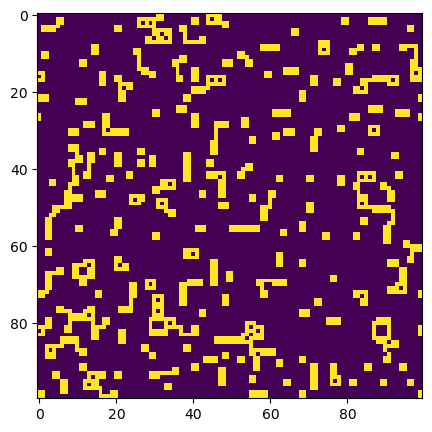

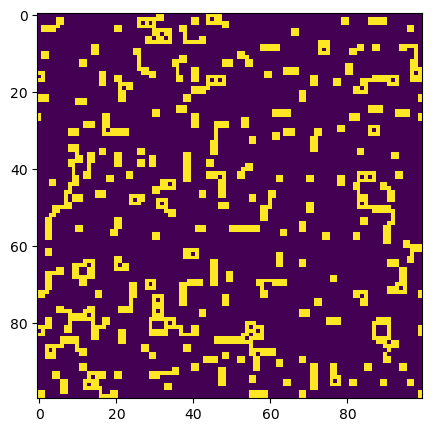

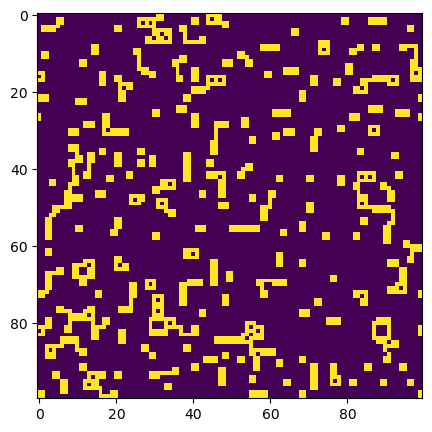

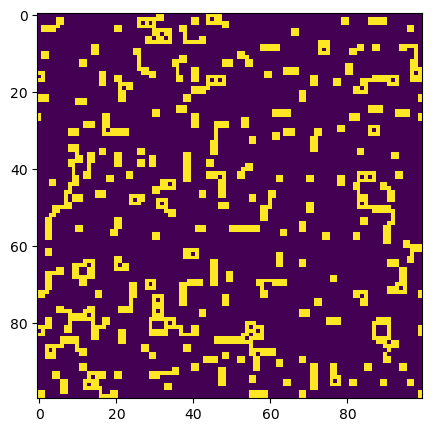

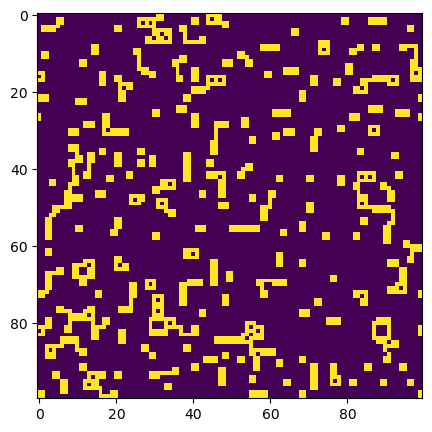

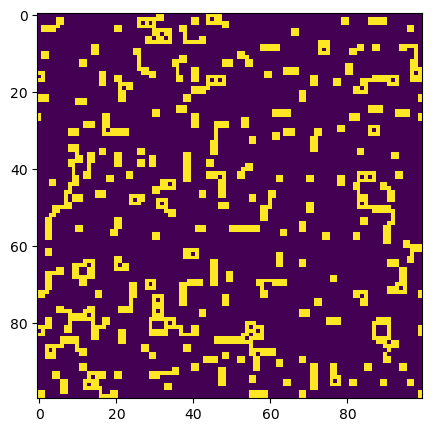

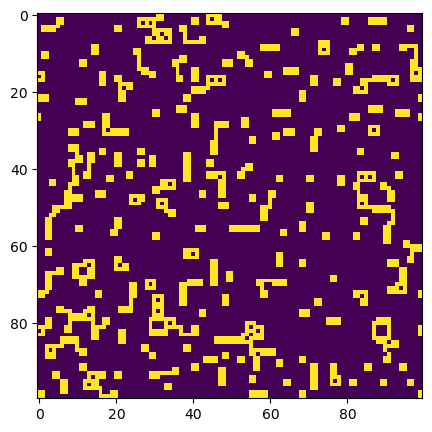

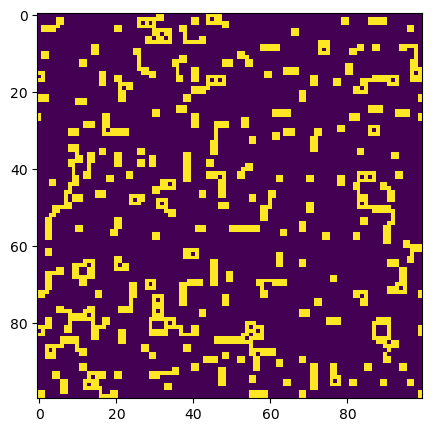

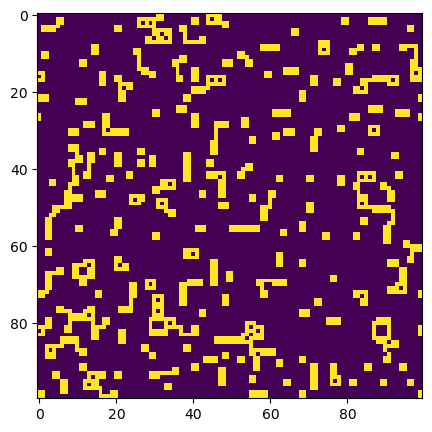

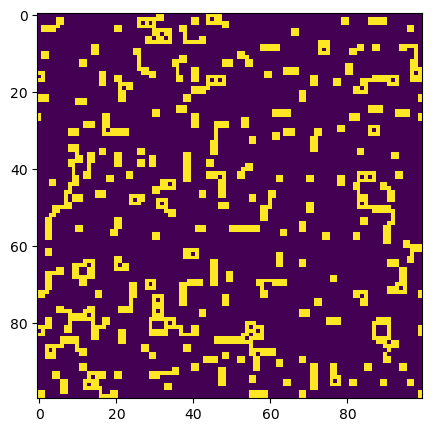

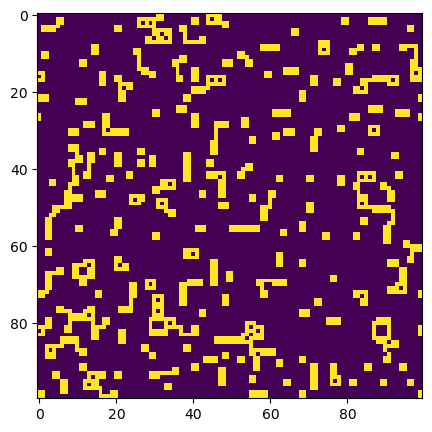

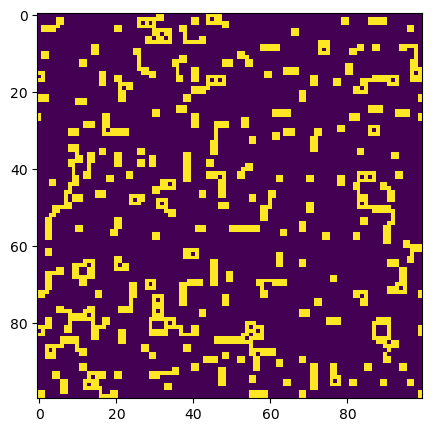

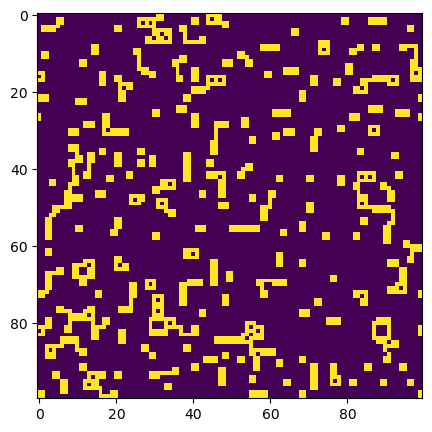

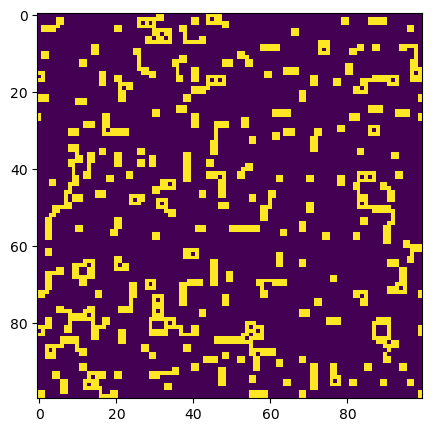

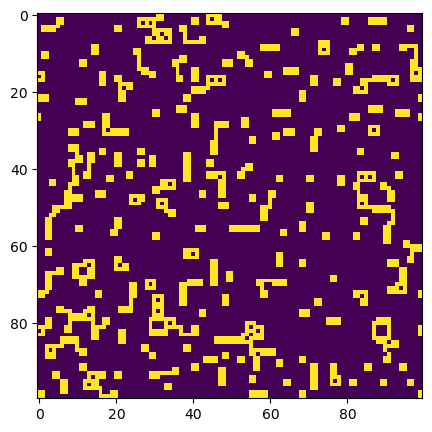

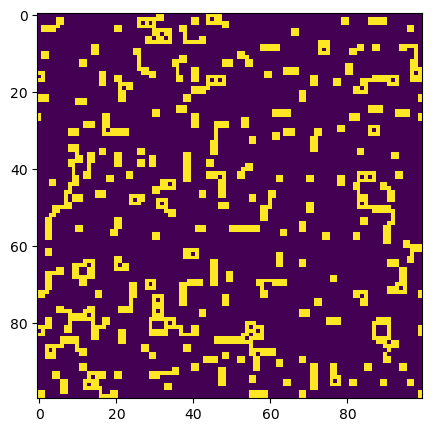

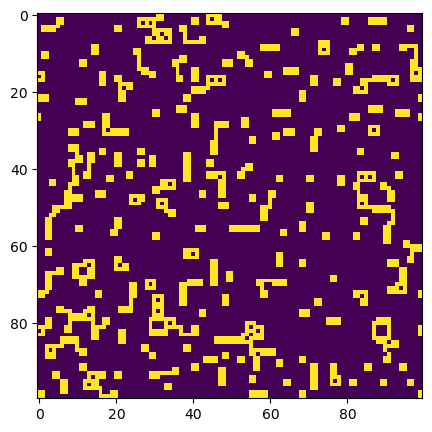

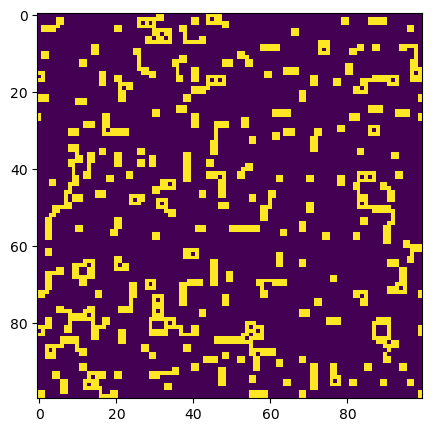

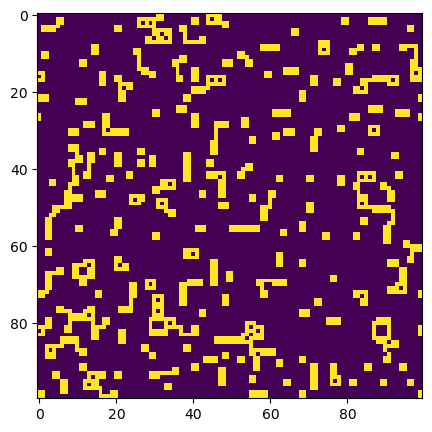

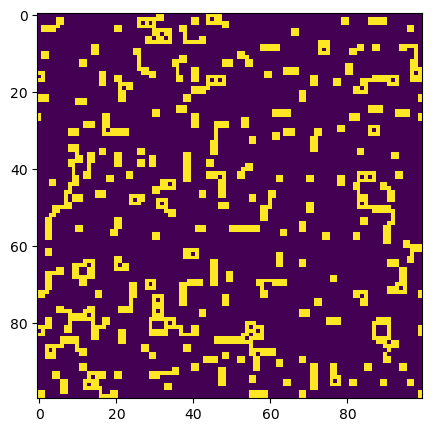

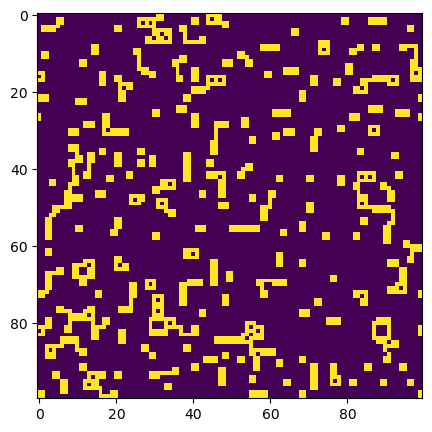

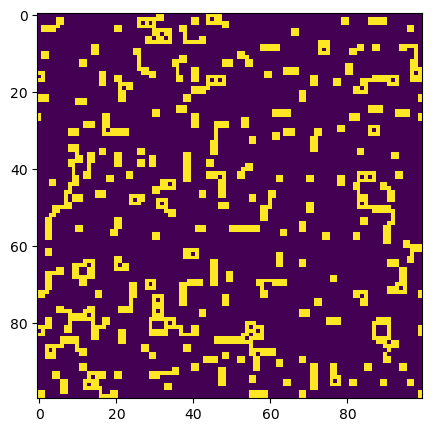

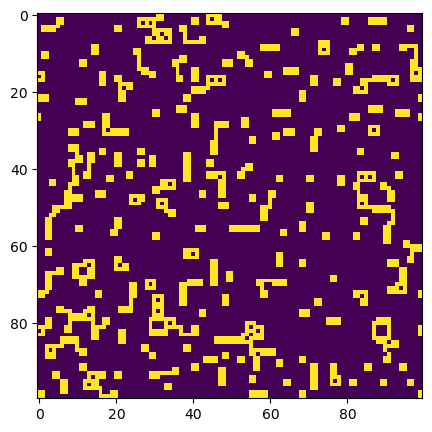

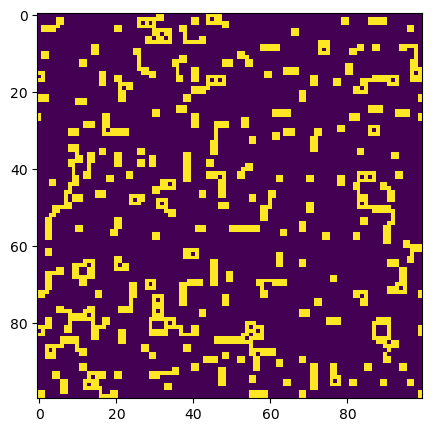

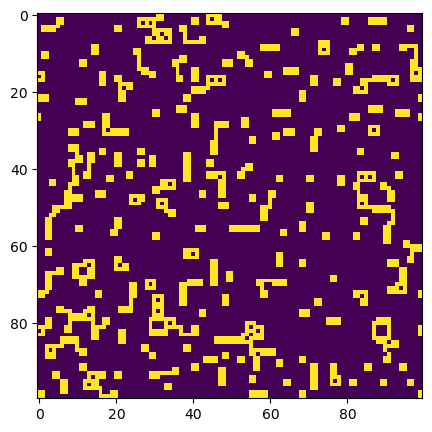

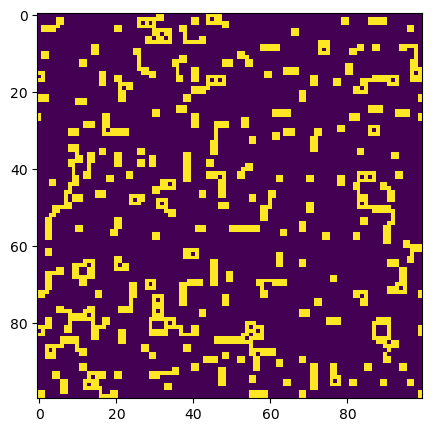

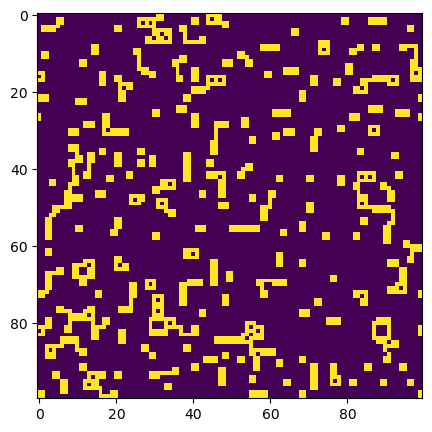

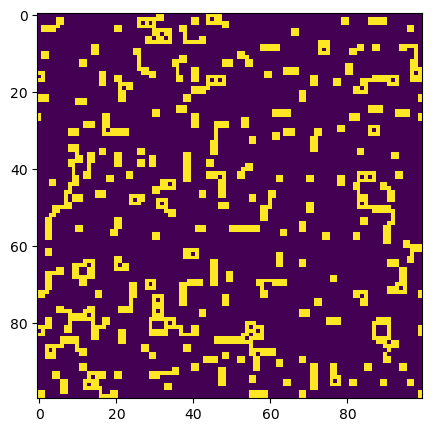

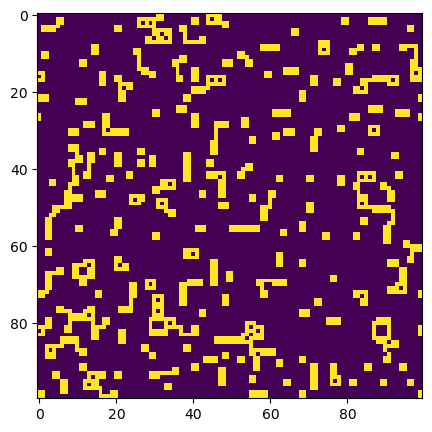

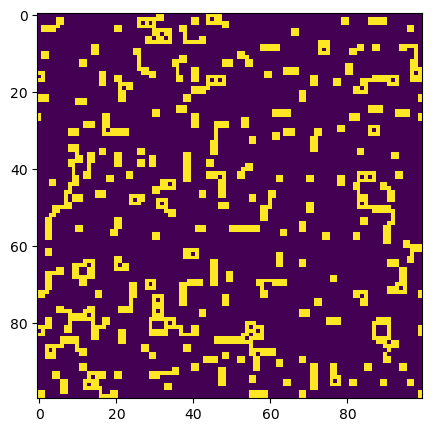

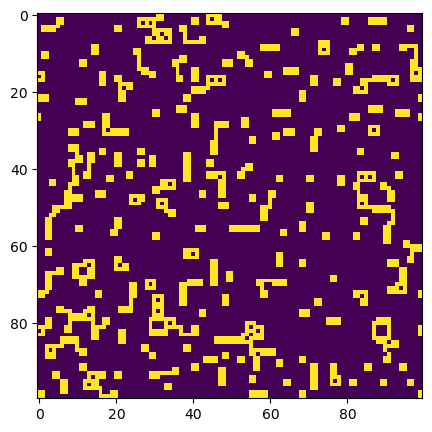

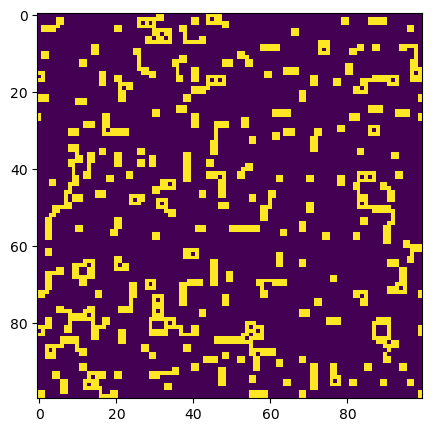

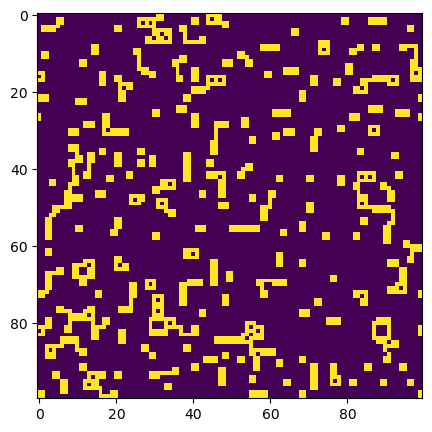

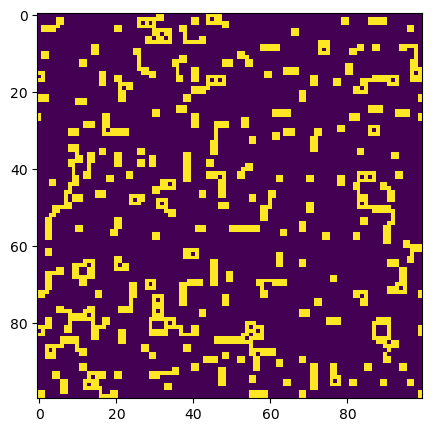

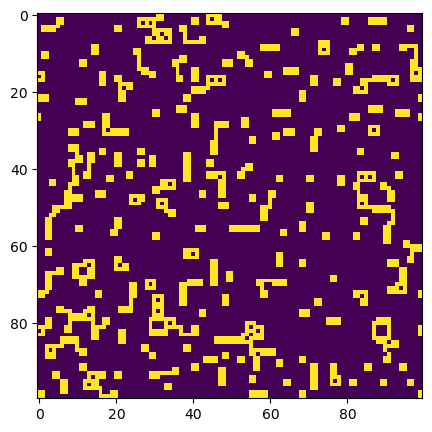

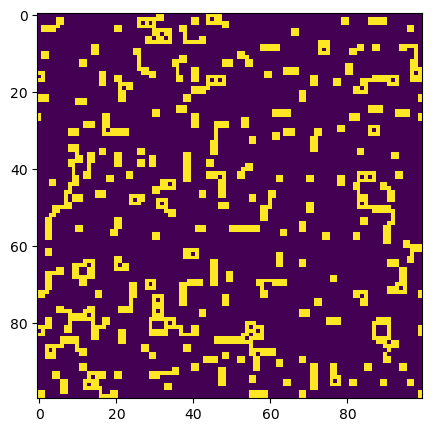

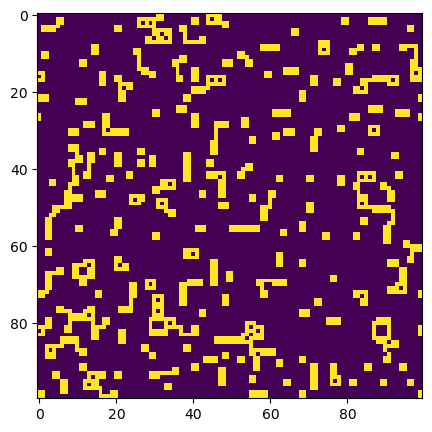

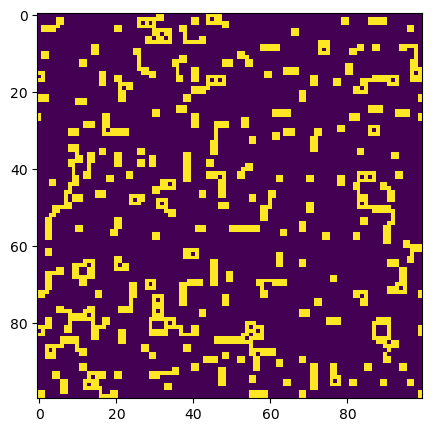

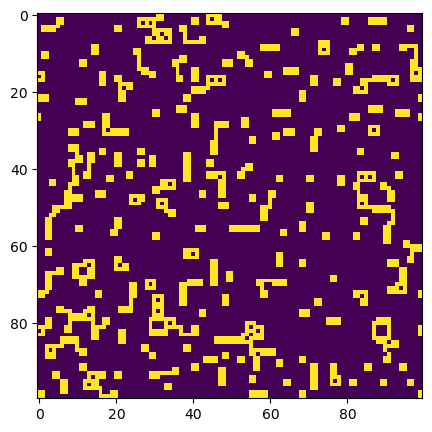

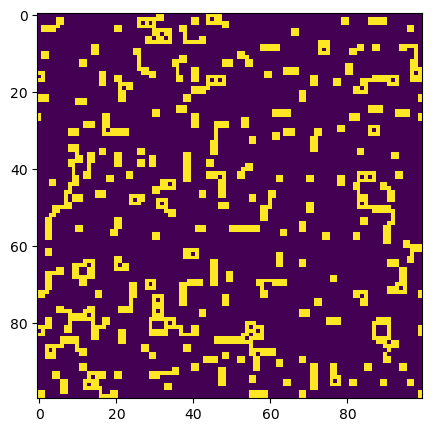

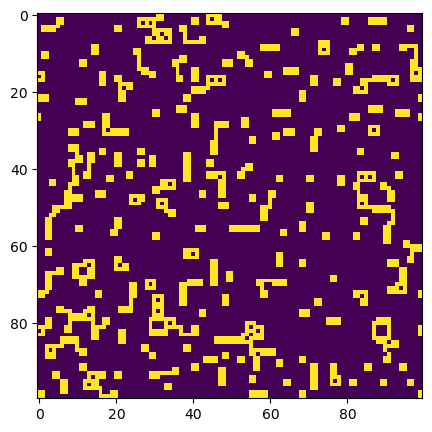

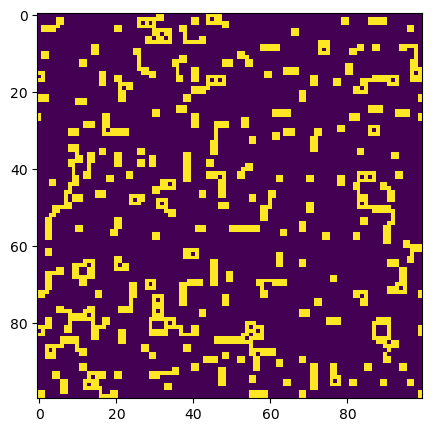

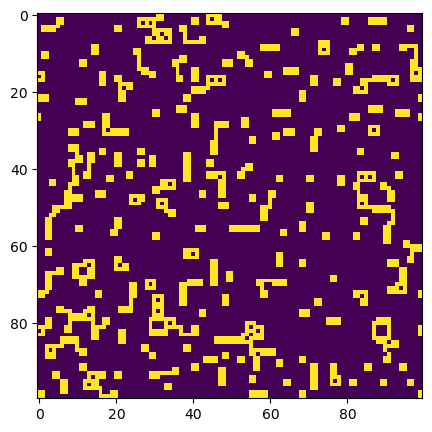

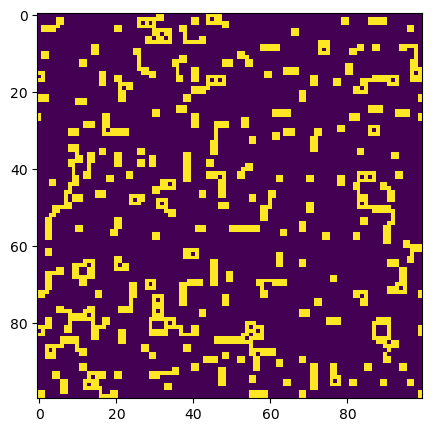

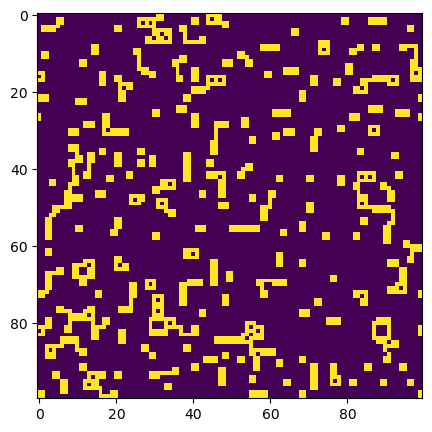

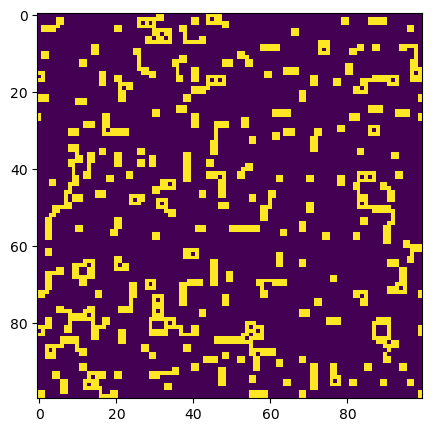

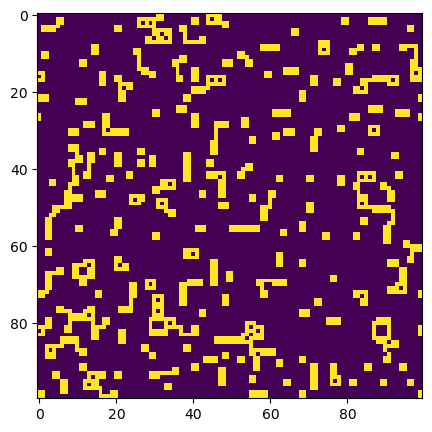

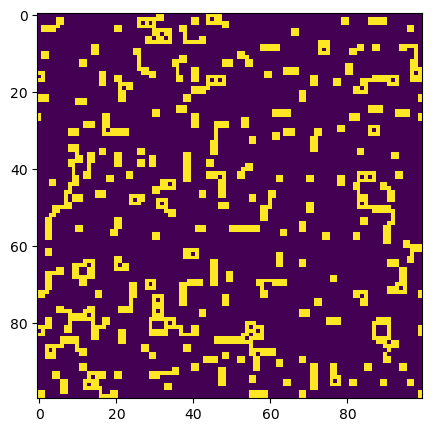

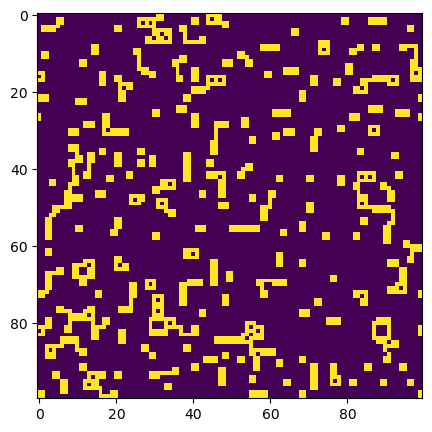

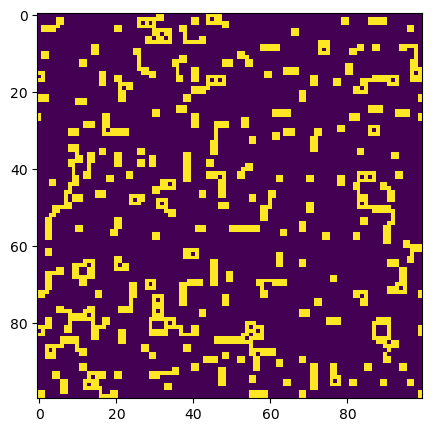

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
# generate a board
board = genBoard(5000,100)
# iterate over game
for i in range(100):
    # clear old figure
    clear_output(wait=True)
    # update the figure using drawBoard function 
    display(drawBoard(board))
    # progress the board by one step
    board = golStep(board)
    